# Machine Learning
---

The following ML models are tested:
- Decision Tree Classification
- Logistic Regression Classification
- Support Vector Machine Classification
- Random Forest Classification

## Initialization

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score

In [2]:
jobData = pd.read_csv("Datasets/cleaned_data.csv")
jobData.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,country_code_is_UA,country_code_is_UG,country_code_is_US,country_code_is_VI,country_code_is_VN,country_code_is_ZA,country_code_is_ZM,country_code,lemmatized_documents,NLP_Pred
0,1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NOBENEFITS,False,...,False,False,True,False,False,False,False,US,marketing intern marketing food52 create groun...,8.762290e-137
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,False,...,False,False,False,False,False,False,False,NZ,customer service - cloud video production succ...,0.000000e+00
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NODEPARTMENT,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NOBENEFITS,False,...,False,False,True,False,False,False,False,US,commission machinery assistant cma nodepartmen...,4.982583e-125
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,False,...,False,False,True,False,False,False,False,US,account executive - washington dc sale passion...,0.000000e+00
4,5,Bill Review Manager,"US, FL, Fort Worth",NODEPARTMENT,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,False,...,False,False,True,False,False,False,False,US,bill review manager nodepartment spotsource so...,6.443834e-176


In [3]:
y = pd.DataFrame(jobData['fraudulent'])

to_drop = ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country_code', 'fraudulent', 'lemmatized_documents']
X = jobData.copy()
X.drop(to_drop, axis = 1, inplace = True)

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

print("X_train:\t", len(X_train))
print("X_test:\t\t", len(X_test))
print("y_train:\t", len(y_train))
print("y_test:\t\t", len(y_test))

X_train:	 12516
X_test:		 5364
y_train:	 12516
y_test:		 5364


## Decision Tree


In [5]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Train data accuracy:	 0.9831415787791626
Train data f1_score:	 0.8339889850511408


<AxesSubplot:>

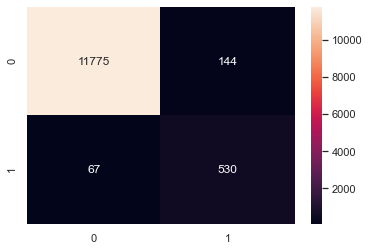

In [6]:
train_pred = pd.DataFrame(dectree.predict(X_train), columns=['prediction'], index=y_train.index)
train_results = pd.concat([y_train, train_pred], axis=1)

print("Train data accuracy:\t", dectree.score(X_train, y_train))
print("Train data f1_score:\t", f1_score(y_train, train_pred))

sb.heatmap(confusion_matrix(y_train, train_pred), annot=True, fmt='d')

Test data accuracy:	 0.9787472035794184
Test data f1_score:	 0.8080808080808081


<AxesSubplot:>

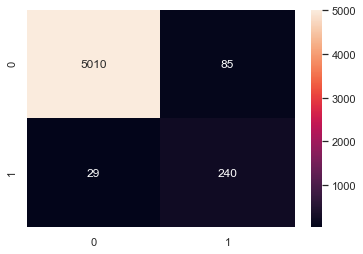

In [7]:
test_pred = pd.DataFrame(dectree.predict(X_test), columns=['prediction'], index=y_test.index)
test_results = pd.concat([y_test, test_pred], axis=1)

print("Test data accuracy:\t", dectree.score(X_test, y_test))
print("Test data f1_score:\t", f1_score(y_test, test_pred))

sb.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='d')

Annotation(3348, 5707.8, 'NLP_Pred <= 1.0\ngini = 0.091\nsamples = 12516\nvalue = [11919, 597]\nclass = False')
Annotation(3348, 5707.8, 'NLP_Pred <= 0.0\ngini = 0.01\nsamples = 11779\nvalue = [11720, 59]\nclass = False')
Annotation(1674, 4077, 'salary_lower_limit <= 6133312.0\ngini = 0.003\nsamples = 11487\nvalue = [11467, 20]\nclass = False')
Annotation(837, 2446.2, 'gini = 0.003\nsamples = 11485\nvalue = [11466, 19]\nclass = False')
Annotation(837, 2446.2, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = False')
Annotation(1674, 4077, 'industry_is_Accounting <= 0.5\ngini = 0.231\nsamples = 292\nvalue = [253, 39]\nclass = False')
Annotation(2511, 2446.2, 'gini = 0.205\nsamples = 285\nvalue = [252, 33]\nclass = False')
Annotation(2511, 2446.2, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = True')
Annotation(3348, 5707.8, 'country_code_is_US <= 0.5\ngini = 0.394\nsamples = 737\nvalue = [199, 538]\nclass = True')
Annotation(5022, 4077, 'has_company_logo <= 0.5\ngini = 0.5\nsamples

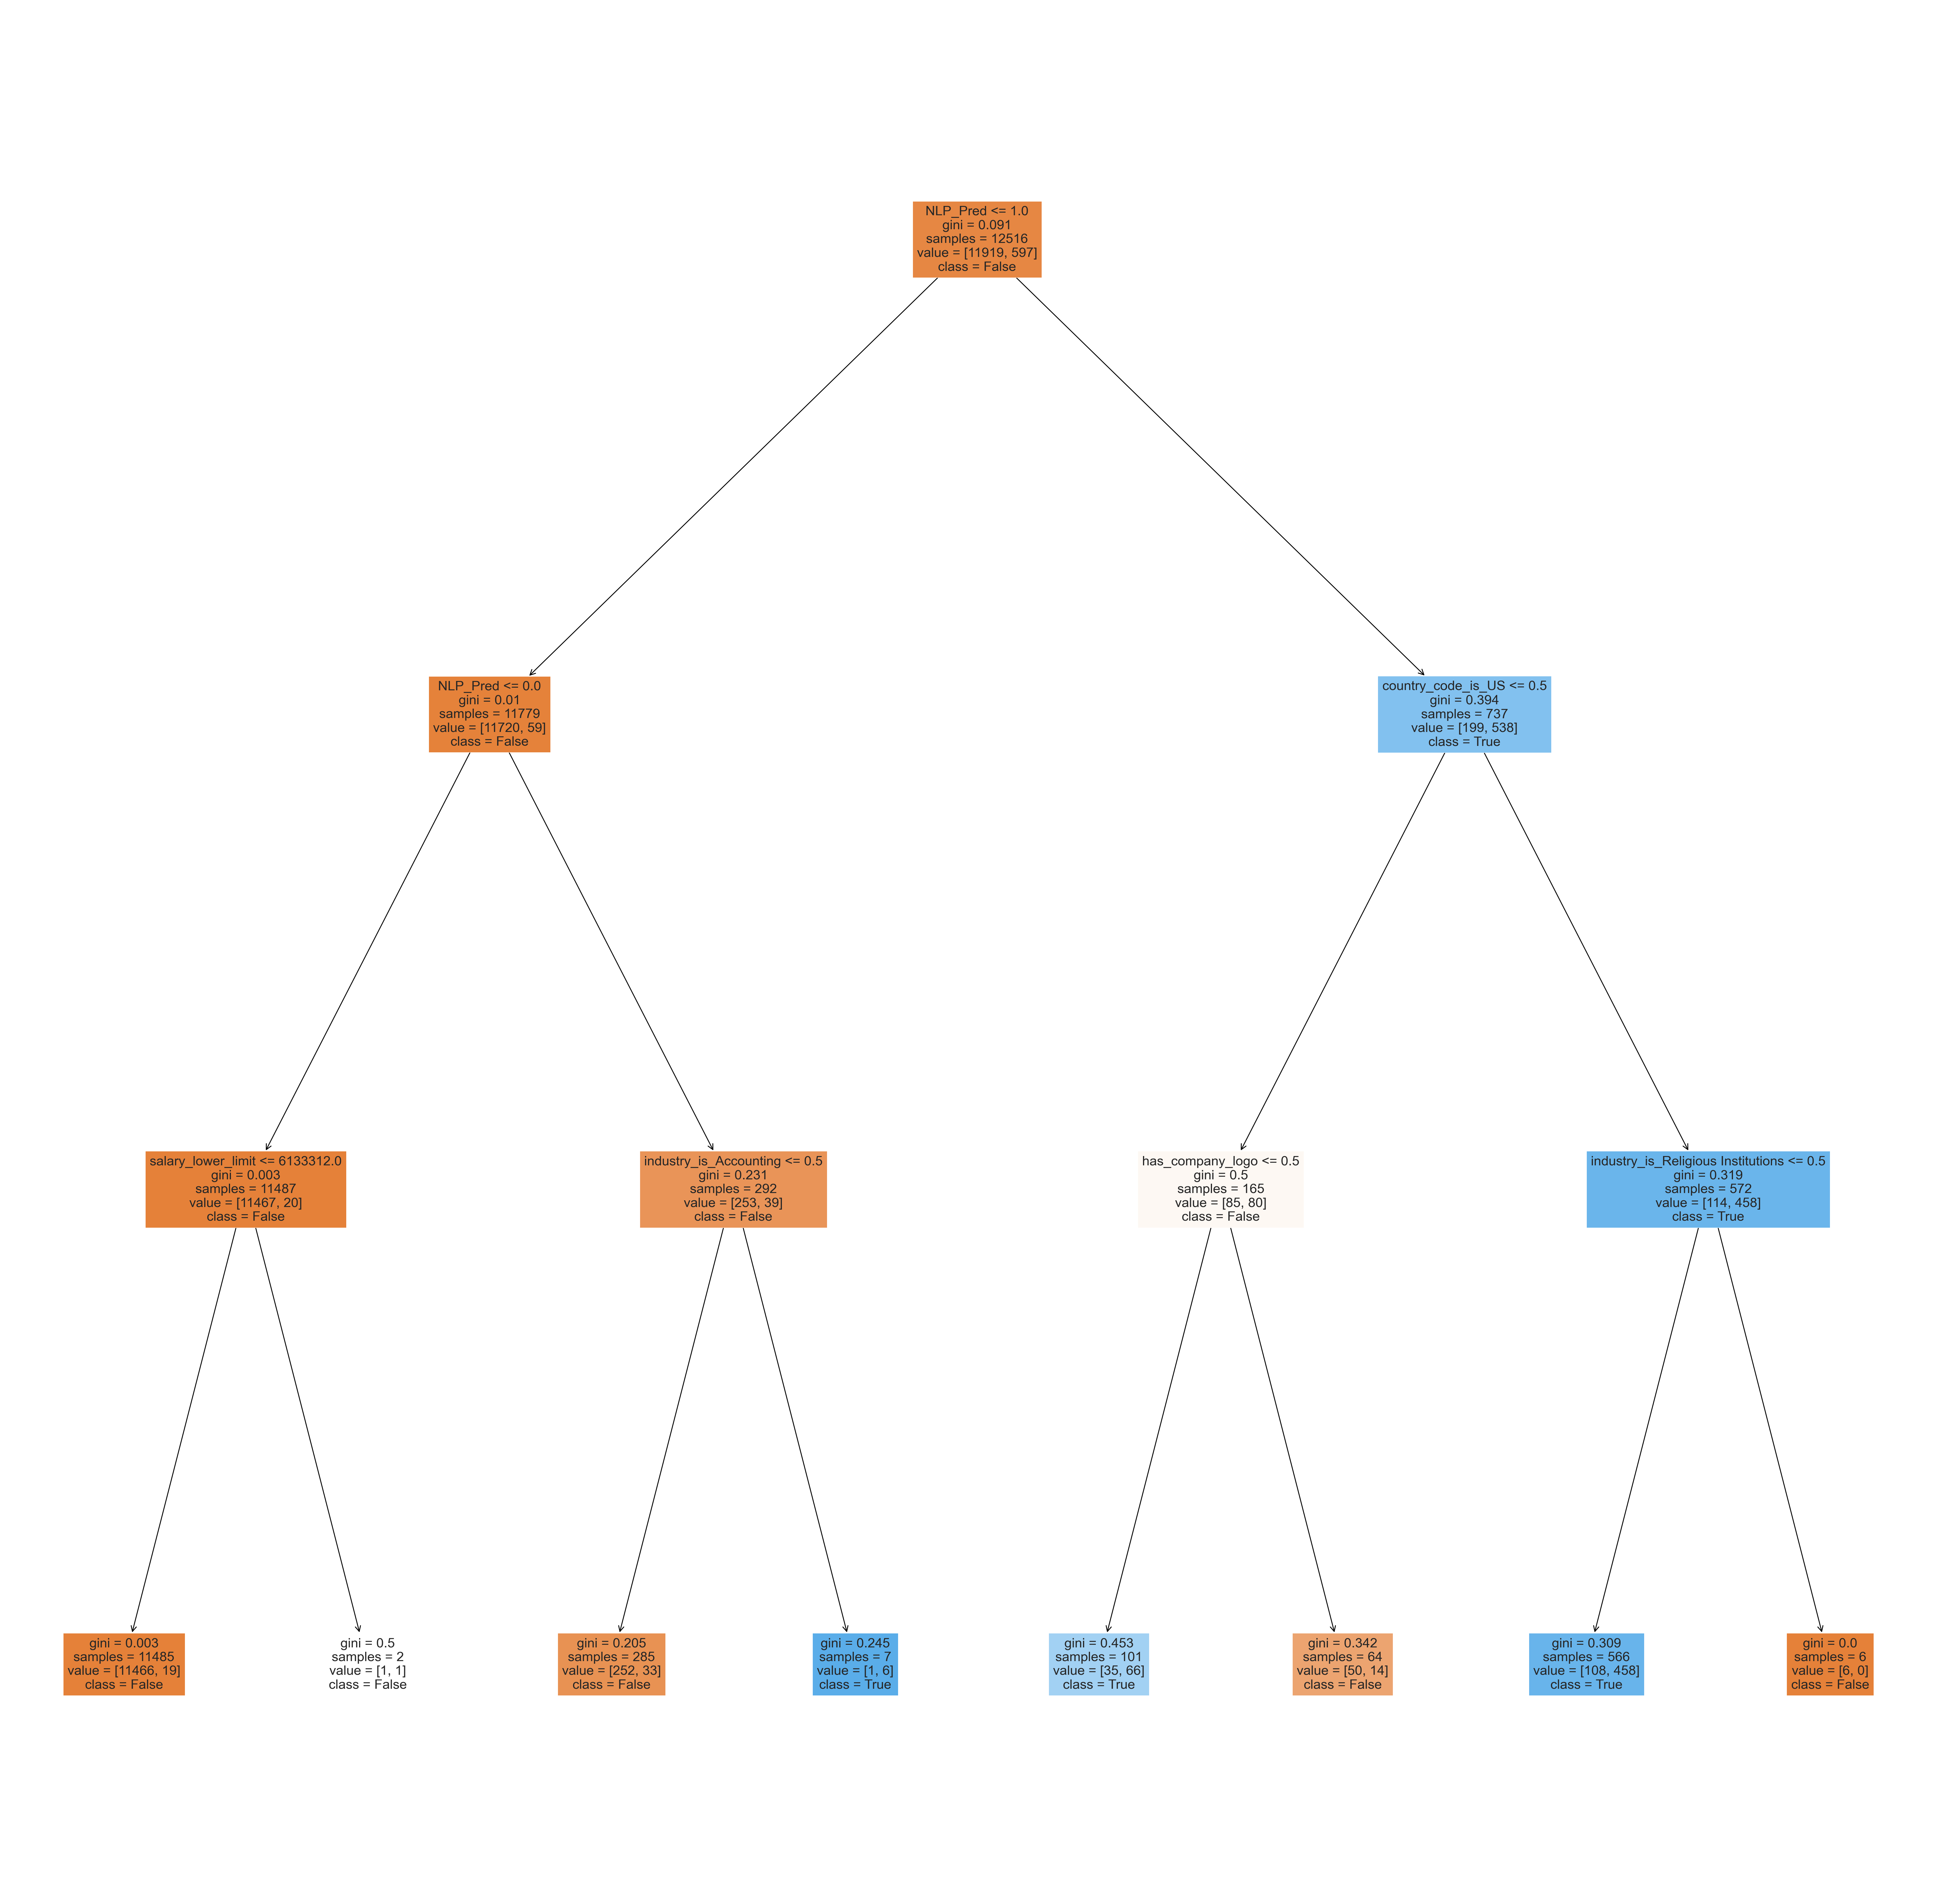

In [8]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(120, 120))
out = plot_tree(dectree, 
          feature_names = X.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    print(o)
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

## Logistic Regression

Uses the logistic regression model. However, the default model does not perform well on imbalanced data. The current data set has 95% of values in 1 class, which will affect the model. Hence, additional weightage must be applied to the 'fraudulent' class. 

This increases cost associated with predicting a fraudulent class wrongly in the cost function. The model now values getting a fraudulent prediction correct more than getting a not-fraudulent prediction wrong.

In [9]:
from sklearn.linear_model import LogisticRegression

#Uses a weightage of 1:16
logreg = LogisticRegression(class_weight={0: 1, 1: 16})
logreg.fit(X_train, y_train['fraudulent'])

LogisticRegression(class_weight={0: 1, 1: 16})

Train data accuracy:	 0.9392777245126238
Train data f1_score:	 0.47945205479452047


<AxesSubplot:>

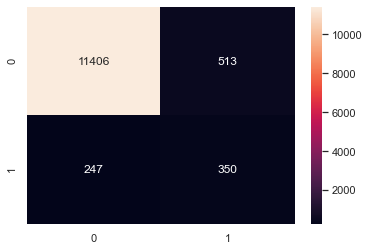

In [10]:
train_pred = pd.DataFrame(logreg.predict(X_train), columns=['prediction'], index=y_train.index)
train_results = pd.concat([y_train, train_pred], axis=1)

print("Train data accuracy:\t", logreg.score(X_train, y_train))
print("Train data f1_score:\t", f1_score(y_train, train_pred))

sb.heatmap(confusion_matrix(y_train, train_pred), annot=True, fmt='d')

Test data accuracy:	 0.9345637583892618
Test data f1_score:	 0.45241809672386896


<AxesSubplot:>

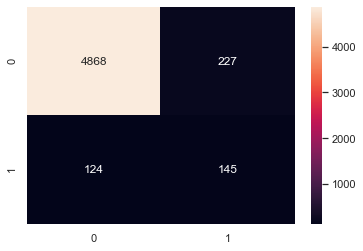

In [11]:
test_pred = pd.DataFrame(logreg.predict(X_test), columns=['prediction'], index=y_test.index)
test_results = pd.concat([y_test, test_pred], axis=1)

print("Test data accuracy:\t", logreg.score(X_test, y_test))
print("Test data f1_score:\t", f1_score(y_test, test_pred))

sb.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='d')

## Support Vector Machine


In [12]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', gamma=0.5, C=70) # parameters to be adjusted

#Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Train data Accuracy:	 0.9954458293384468
Train Data Precision:	 0.9313099041533547
Train Data F1 score:	 0.9533932951757972


<AxesSubplot:>

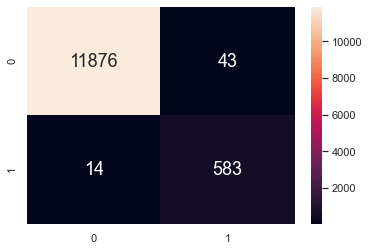

In [13]:
print("Train data Accuracy:\t", accuracy_score(y_train, y_train_pred))
print("Train Data Precision:\t", precision_score(y_train, y_train_pred))
print("Train Data F1 score:\t", f1_score(y_train, y_train_pred))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test data Accuracy:	 0.9787472035794184
Test Data Precision:	 0.8506787330316742
Test Data F1 score:	 0.7673469387755101


<AxesSubplot:>

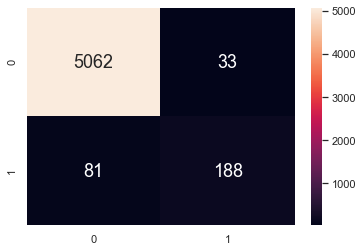

In [14]:
print("Test data Accuracy:\t", accuracy_score(y_test, y_test_pred))
print("Test Data Precision:\t", precision_score(y_test, y_test_pred))
print("Test Data F1 score:\t", f1_score(y_test, y_test_pred))

sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Random Forest

In [15]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=255)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Train data Accuracy:	 0.9973633748801534
Train Data Precision:	 0.9548387096774194
Train Data F1 score:	 0.9728841413311421


<AxesSubplot:>

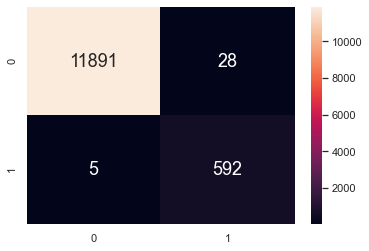

In [16]:
print("Train data Accuracy:\t", accuracy_score(y_train, y_train_pred))
print("Train Data Precision:\t", precision_score(y_train, y_train_pred))
print("Train Data F1 score:\t", f1_score(y_train, y_train_pred))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test data Accuracy:	 0.9873228933631618
Test Data Precision:	 0.8910505836575876
Test Data F1 score:	 0.8707224334600762


<AxesSubplot:>

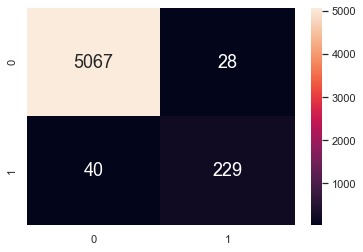

In [17]:
print("Test data Accuracy:\t", accuracy_score(y_test, y_test_pred))
print("Test Data Precision:\t", precision_score(y_test, y_test_pred))
print("Test Data F1 score:\t", f1_score(y_test, y_test_pred))

sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [18]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp.head(10)

NLP_Pred                                0.479726
has_company_logo                        0.052761
industry_is_Oil & Energy                0.027772
salary_upper_limit                      0.022695
salary_lower_limit                      0.020937
has_questions                           0.018184
function_type_is_Administrative         0.016635
country_code_is_US                      0.015787
industry_is_Accounting                  0.011636
required_experience_is_Not specified    0.011425
dtype: float64